# Week 3 Introduction to image processing assignment

# importing the required libraries

In [ ]:
!pip install -q pydicom
import pydicom
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import json
from ipywidgets import interact, interactive
from typing import List, Tuple, Union

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 5.6 MB/s eta 0:00:00


# downloading the data
#### In this section we are going to download a public dataset and unzip it for later usage.

In [ ]:
! wget --no-check-certificate https://data.idoimaging.com/dicom/1010_brain_mr/1010_brain_mr_04_lee.zip
! unzip 1010_brain_mr_04_lee.zip

--2024-04-11 00:37:35--  https://data.idoimaging.com/dicom/1010_brain_mr/1010_brain_mr_04_lee.zip
Resolving data.idoimaging.com (data.idoimaging.com)... 65.8.178.25, 65.8.178.49, 65.8.178.38, ...
Connecting to data.idoimaging.com (data.idoimaging.com)|65.8.178.25|:443... connected.
  Issued certificate has expired.
HTTP request sent, awaiting response... 200 OK
Length: 2212367 (2.1M) [application/zip]
Saving to: ‘1010_brain_mr_04_lee.zip’

1010_brain_mr_04_le 100%[===================>]   2.11M  --.-KB/s    in 0.1s    

2024-04-11 00:37:35 (17.5 MB/s) - ‘1010_brain_mr_04_lee.zip’ saved [2212367/2212367]

Archive:  1010_brain_mr_04_lee.zip
   creating: 1010_brain_mr_04_lee/
  inflating: 1010_brain_mr_04_lee/img_000.dcm  
  inflating: 1010_brain_mr_04_lee/img_001.dcm  
  inflating: 1010_brain_mr_04_lee/img_002.dcm  
  inflating: 1010_brain_mr_04_lee/img_003.dcm  
  inflating: 1010_brain_mr_04_lee/img_004.dcm  
  inflating: 1010_brain_mr_04_lee/img_005.dcm  
  inflating: 1010_brain_mr_04_l

In [ ]:
dir_path = '1010_brain_mr_04_lee'

# Excercise 1: Read Dicom files from a directory.
For this question, you need to read all the `.dcm` files inside the provided directory slice by slice, and return the loaded slices in a format of a single `Numpy List` variable.

* Define a function for reading the DICOM files and sort them based on their `instance numbers`
* Access the patient ID from the dicom object using the following ways and print them:
  - indexing
  - attributes (tags)

In [ ]:
test_slice = pydicom.dcmread('/content/1010_brain_mr_04_lee/img_001.dcm')
test_slice

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 222
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.5962.99.1.1647423216.1757746261.1397511827184.204.0
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.5962.99.2
(0002, 0013) Implementation Version Name         SH: 'PIXELMEDJAVA001'
(0002, 0016) Source Application Entity Title     AE: 'DicomBrowser'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M', 'ND']
(0008, 0012) Instance Creation Date              DA: '20080801'
(0008, 0013) Instance Creation Time              TM: '003029.250'
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 001

In [ ]:
for tag in test_slice:
    print(f"{tag.tag} ({tag.description()}): {tag.value}")

(0008, 0008) (Image Type): ['ORIGINAL', 'PRIMARY', 'M', 'ND']
(0008, 0012) (Instance Creation Date): 20080801
(0008, 0013) (Instance Creation Time): 003029.250
(0008, 0016) (SOP Class UID): 1.2.840.10008.5.1.4.1.1.4
(0008, 0018) (SOP Instance UID): 1.3.6.1.4.1.5962.99.1.1647423216.1757746261.1397511827184.204.0
(0008, 0020) (Study Date): 20080801
(0008, 0021) (Series Date): 20080801
(0008, 0022) (Acquisition Date): 20080801
(0008, 0023) (Content Date): 20080801
(0008, 0030) (Study Time): 000000.000
(0008, 0031) (Series Time): 002858.419
(0008, 0032) (Acquisition Time): 002908.364
(0008, 0033) (Content Time): 003029.250
(0008, 0050) (Accession Number): 
(0008, 0060) (Modality): MR
(0008, 0070) (Manufacturer): Manufacturer
(0008, 0090) (Referring Physician's Name): 
(0008, 1030) (Study Description): HEAD^BRAIN
(0008, 103e) (Series Description): T2 AX 4MB
(0008, 1090) (Manufacturer's Model Name): Model
(0008, 1140) (Referenced Image Sequence): [(0008, 1150) Referenced SOP Class UID       

In [ ]:
# solution
def load_dicom_slices(dir_path: str, force: bool=False):
  """
  Load and sort a series of dicom files inside the provided folder path.
  """
  slices = [] # Empty array of slices
  for files in os.listdir(dir_path):# For loop to iterate over dicom files
    dc_file = pydicom.dcmread(dir_path + '/' + files) # Read DICOM files
    slices.append(dc_file) # Appending DICOM files to array of slices

  slices.sort(key=lambda x: float(x.InstanceNumber)) # Sorting slices by Instances
  slices = np.array(slices) # Converting to numpy array

  return slices

slices = load_dicom_slices(dir_path)
print("Patient Name(tag):", slices[0].PatientName)
print("Patient Name(index):", slices[0][0x10, 0x10])
print("Number of slices: ", len(slices))
print('Slices dtype: ', type(slices[0]))

Patient Name(tag): BRAIN^MR
Patient Name(index): (0010, 0010) Patient's Name                      PN: 'BRAIN^MR'
Number of slices:  32
Slices dtype:  <class 'pydicom.dataset.FileDataset'>


In [ ]:
print("Patient Name(tag):", slices[0].PatientName)
print("Patient Name(index):", slices[0][0x10, 0x10].value)
print("Patient Instance: ", slices[1].InstanceNumber)

Patient Name(tag): BRAIN^MR
Patient Name(index): BRAIN^MR
Patient Instance:  2


In [ ]:
# Viewing slices shape.
print("Volume Shape (Row, Column): ", slices[0].Rows, slices[0].Rows)

Volume Shape (Row, Column):  256 256


interactive(children=(IntSlider(value=15, description='x', max=31), Output()), _dom_classes=('widget-interact'…

<function __main__.dicom_animation(x)>

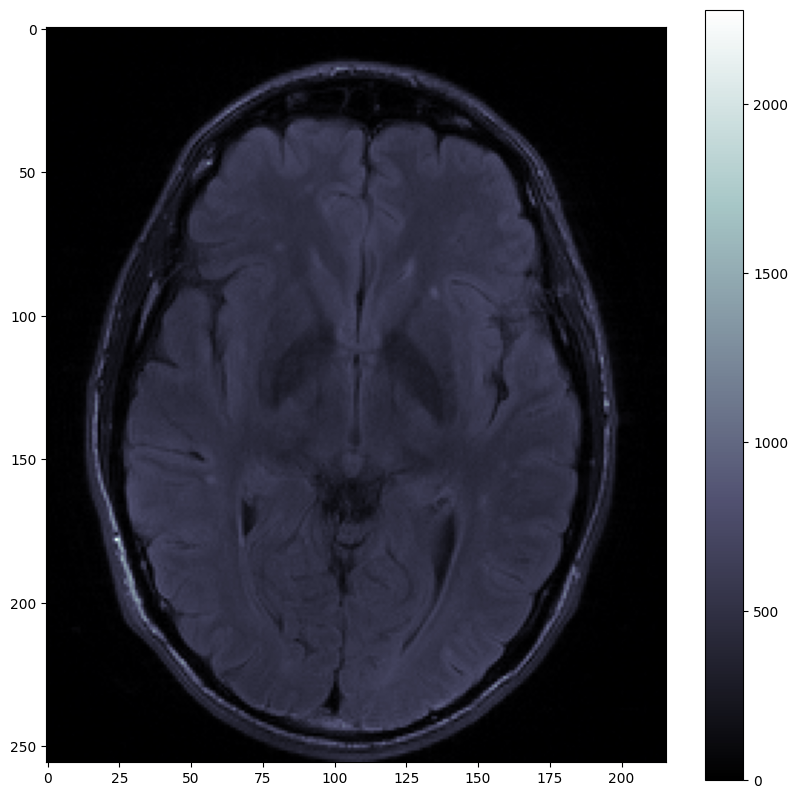

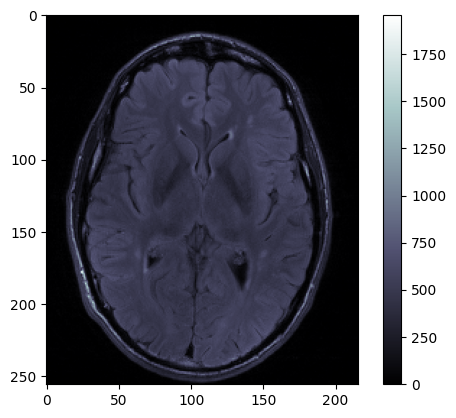

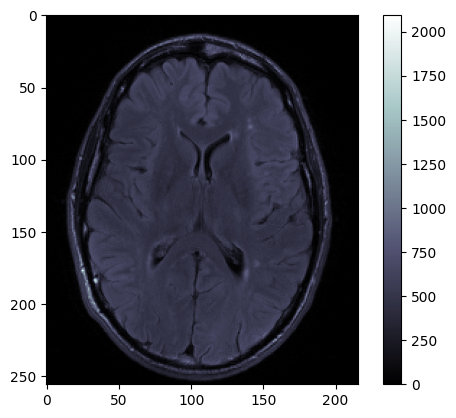

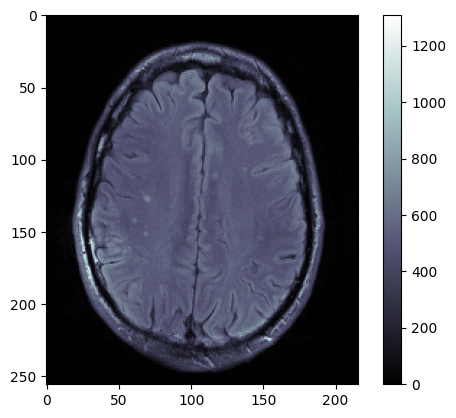

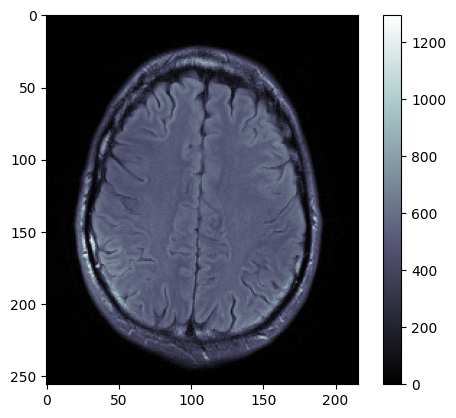

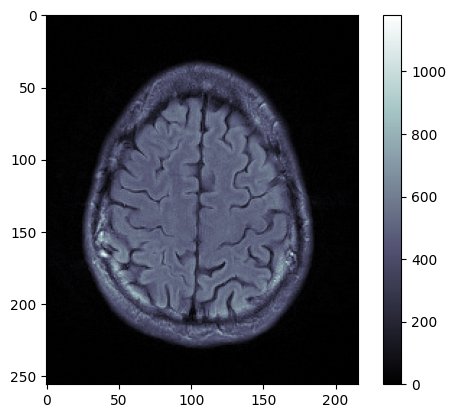

In [ ]:
# interactive slides for viewing dicom slides
plt.figure(1, figsize=(10, 10))
def dicom_animation(x):
    plt.imshow(slices[x].pixel_array, cmap=plt.cm.bone)
    plt.colorbar()
    return x

interact(dicom_animation, x=(0, len(slices)-1))

In [ ]:
# Accessing the patient id.
print("Patient ID(tag):", slices[20].PatientID)

Patient ID(tag): 1010


# Exercise 2:
#### For this exercise you need to implement four function and try applying them on the loaded slices.
* Define a function named `to_hu` for transforming the slices into Hounsfield scale.
* Define a function named `window_clip` for cliping the pixel intensity range of each slice using a single center and windows width. Defined window describes your interested intensity range.
* Define a function named `to_3d_numpy` to convert all the slices into a single Numpy ndarray image. This function is able to change the datatype of the output image if the user likes to change the new image datatype.
* Define a function named `min_max_scaler` to scale a Numpy array into range `0` and `1` for easier visualization with matplotlib. This function is able to change the datatype (optional dtype by user) of the output image to `float`.



In [ ]:
def to_hu(slices: List):
    """Transform a list of slices to a Hounsfield Unit Scale.
    This function takes the loaded slices and return a list of transformed Numpy array format slices.
    """
    hu_slices = []
    intercept = slices[0].RescaleIntercept if 'RescaleIntercept' in slices[0] else 0
    slope = slices[0].RescaleSlope if 'RescaleSlope' in slices[0] else 1
    for sli in slices:
      image = sli.pixel_array # Accessing Images in DICOM Files

      # Applying HU=Pixel Value×Rescale Slope+Rescale Intercept
      hu_image = image * slope + intercept
      hu_slices.append(hu_image)

    return hu_slices

In [ ]:
def window_clip(slices: List, window_cent: int, window_width: int):
    """Clip a list of slices pixels, one by one, into a specific intensity range based on the provided window location and size.
    All the pixels inside each single slice with a intensity below and over the window range will be clipped into the min and max intensity range window covers.
    This function returns a list of clipped Numpy array slices.
    """
    min_val = window_cent - window_width // 2
    max_val = window_cent + window_width // 2
    cliped_slices = []
    for sli in slices:
      cliped_slice = np.clip(sli, a_min=min_val, a_max=max_val)
      cliped_slices.append(cliped_slice)

    return cliped_slices

In [ ]:
def to_3d_numpy(slices: List, dtype=None):
    """Stack up all slices into a single NumPy array of the provided data type.
    """
    image = np.stack(slices, axis = 0) # Stacking Slices using np.stack()

    return image

def min_max_scaler(image: np.ndarray, dtype: Union[type, None]=None):
    """
    Scale a single Numpy array image intensity into range `0` and `1`
    """
    image = image.astype(np.float32)
    image /= 255

    return image

def visualizer(slice: np.ndarray, title= ''):
    """Visualize a slice of type numpy array with the provided title."""
    plt.imshow(slice, cmap=plt.cm.bone)
    plt.title(title)
    plt.show()

Numpy array image shape is:  (32, 256, 216)
Transformed image pixel value range (min, max):  (0, 1000)
Scaled image pixel value range (min, max):  (0.0, 3.9215686)


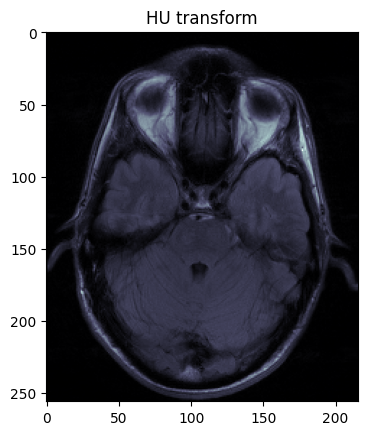

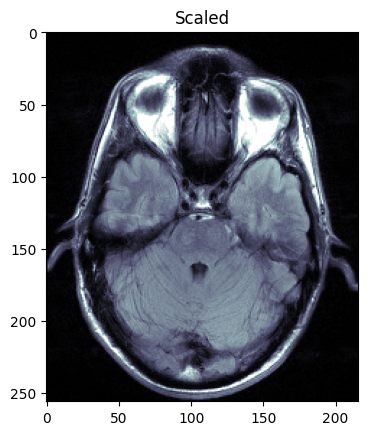

In [ ]:
processed_slices_hu = to_hu(slices)
processed_slices_cliped = window_clip(processed_slices_hu, 500, 1000) # Extracting soft tissues.
image = to_3d_numpy(processed_slices_cliped, dtype=None)

print('Numpy array image shape is: ', image.shape)
print('Transformed image pixel value range (min, max): ', (image.min(), image.max()))

scaled_image = min_max_scaler(image, dtype=np.float32)
print('Scaled image pixel value range (min, max): ', (scaled_image.min(), scaled_image.max()))

# You can see the scaled version of your slected region using the `window_clip` function here.
visualizer(processed_slices_hu[10], 'HU transform')
visualizer(scaled_image[10], 'Scaled')

# Exercise 3: Saving the data in numpy format
* Convert original frames into a numpy image array without any preprocessing, and save it as a single `.npy` file named `original_numpy_version.npy`. Keeping the original slices as a 3d numpy sample in case we needed it in the future.
* Create an ouput folder named `scaled_slices` and save all the scaled slices one by one into the folder. Assign a unique name to each slice while you are keeping the original order.

In [ ]:
original_numpy_version = []
for sli in slices:
  img = sli.pixel_array
  original_numpy_version.append(img)

original_numpy_version = np.array(original_numpy_version)
np.save('/content/original_numpy_version.npy', original_numpy_version)

In [ ]:
# Convert the original slices into a 3d nmpy array and save it as a .npy file format.
new_3dnp = np.stack(slices, axis = 0)
np.save('/content/original_numpy3d_version.npy', new_3dnp)

In [ ]:
!mkdir scaled_slices

In [ ]:
type(scaled_image[0])

numpy.ndarray

In [ ]:
# Create a folder and save the scaled slices one by one.
val = 0
for img in scaled_image:
  np.save(f'/content/scaled_slices/img-{val}', img)
  val = val + 1

# Exercise 4: Save the processed numpy data as a series of DICOM files
#### In this section, you need to save the scaled version image of the loaded dicom slices into a series of dicom files inside a directory named `scaled_slices_dicom`, be splitting the image into a sequence of slices in the original order.  
To do so, you need to create a new dicom dataset for each slide, import the original dicom information into the new created dataset, and save it with a unique name inside the mentioned directory.

In [ ]:
from pydicom.dataset import Dataset, FileDataset
from pydicom.uid import ExplicitVRLittleEndian
import pydicom._storage_sopclass_uids

os.makedirs('scaled_slices_dicom', exist_ok=True)

# Your code here.

In [ ]:
import copy
from pydicom.dataset import Dataset, FileMetaDataset

for index, (original_slice, scaled) in enumerate(zip(slices, scaled_image)):
    # Create a new DICOM dataset from the original, except for PixelData
    new_ds = copy.deepcopy(original_slice)

    new_ds.PixelData = scaled.tobytes()
    new_ds.Rows, new_ds.Columns = scaled.shape

    # Ensure endianess and VR are set correctly
    new_ds.is_little_endian = True
    new_ds.is_implicit_VR = True

    # Update file meta information
    new_ds.file_meta = FileMetaDataset()
    new_ds.file_meta.TransferSyntaxUID = pydicom.uid.ExplicitVRLittleEndian
    new_ds.file_meta.MediaStorageSOPClassUID = original_slice.file_meta.MediaStorageSOPClassUID
    new_ds.file_meta.MediaStorageSOPInstanceUID = pydicom.uid.generate_uid()
    new_ds.SOPInstanceUID = new_ds.file_meta.MediaStorageSOPInstanceUID

    # Save the new DICOM file
    new_ds.save_as(f"/content/new_dcm_file_{index}.dcm")
